# Tietokonetomografiakuvien rekonstruktio Python-ohjelmointikielellä

Moikka! Tervetuloa tutustumaan tietkonetomografiakuvaukseen (TT-kuvaus), kuvien tietokoneavusteiseen käsittelyyn ja siihen liittyään matematiikkaan!

Tietokonetomografiakuvaus tarkoittaa lääketieteellistä kudosten kuvaamista röntgensäteiden avulla. Perinteisestä röntgenkuvauksesta poiketen, TT-kuvauksessa röntgenmittauksia otetaan eri kulmista useita kappaleita, jotka käsitellään tietokoneen avulla tomografiakuvaksi käyttämällä erityisiä rekonstruktioalgoritmeja. Tässä harjoitustyössä sovelletaan niistä yhtä, Total Variation -menetelmää. Lue lisää TT-kuvauksesta [Wikipediassa](https://fi.wikipedia.org/wiki/Tietokonekerroskuvaus).

Tämän harjoitustyön tutkimuskohteena on intianlootuksen maavarren kappale, joka on muodoltaan luontaisesti epäsymmetrinen ja onteloinen. Kappaleen onteloihin on tässä tapauksessa asetettu erilaisia epäorgaanisia materiaaleja, jotka näkyvät TT-kuvissa poikkeamina kasvinosaan verrattuna. 

Alla kuva tutkimuskappaleesta ja mittausympäristöstä.

<img src="https://github.com/jaapro-git/pythonTVReconstruction/raw/37b9d672f12fdd539ab43b0148ba41c1c7a5d9fc/LotusDec.png" width=66%>

Lisätietoja tutkmusdatasta ja sen tuottamisesta [täällä](https://arxiv.org/abs/1609.07299). Saman linkin kautta löydät myös ladattavan kopion itse mittausdatasta, jota tässäkin harjoitustyössä käytetään, sekä esimerkkejä muista vastaavista kokeista.

Lisäksi kannattaa katsoa havainnollistava video TT-kuvauksesta professori Samuli Siltasen Youtube-kanavalla. Yksinkertainen esimerkki mittaukseta löytyy [täällä](https://www.youtube.com/watch?v=TbLaQo3rgEE) ja pidempi selostus prosessista [täällä](https://www.youtube.com/watch?v=PsdQDOWOhwU).

# Python ympäristön pystyttäminen

Tämä osio tarvitsee suorittaa vain kerran. Tässä haetaan sovelluksen käyttämä mittausdata valmiiksi käsittelyä varten sekä Total Variation -rekonstruktioon tarvittava Python-moduuli. Lisäksi sovelluksen tarvitsemat Python-kirjastot otetaan käyttöön.

Rekonstruktiossa käytettävä algoritmi on ladattavissa ja tarkasteltavissa [GitHubissa](https://github.com/jaapro-git/pythonTVReconstruction).


In [ ]:
# Ensin haetaan mittausdata ja algoritmin toteutus Python-moduulina
!wget -qN https://zenodo.org/record/1254204/files/LotusData256.mat
!wget -qN https://raw.githubusercontent.com/jaapro-git/pythonTVReconstruction/master/pythonTVReconstruction.py

# Algoritmin sisältävä moduuli otetaan käyttöön
import pythonTVReconstruction as tvr

# Lisäksi otetaan käyttöön useita laajasti käytössä olevia Python-moduuleja,
# jotka sisältävät valmiita toteutuksia harjoitustyön tarvitsemista matematiikan
# ja kuvankäsittelyn sovelluksista.

from scipy import io as sio
import numpy as np

from sklearn.preprocessing import normalize
from skimage.transform import iradon

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import time

# Lopuksi esitellään kuvien tallentamista varten Pythonin dictionary-olio
images = {}

# Rekonstruktioon vaikuttavat muuttujat
Tässä osiossa voit käyttää neljää eri parametria muuttamaan sovelluksen muodostamien kuvien käsittelyä. Oletusasetuksilla kuvat muodostuvat nopeasti, mutta kuvien laadussa saattaa olla parannettavaa. Kokeile eri parametreja ja niiden yhdistelmiä, sekä havainnoi, miten ne vaikuttavat kuvien laatuun.

Parametrien selitykset:
1.   Projektiokulmien lukumäärä

>Pienentämällä kulmien lukumäärää menetät osan mittaustiedosta, jolloin puuttuvan informaation vuoksi kuvan laatu heikkenee verrattuna kuvaan, jossa mittauksia on enemmän. Toisaalta, voisiko kuvaan tarvittujen mittausten vähentämisestä olla jotain hyötyä?

2.   Projektiokulmien tyyppi 

*   Harvakulma
>Tällä asetuksella näytteenottokulmat valitaan siten, että ne sijaitsevat lähellä toisiaan, mutta kuvausta ei ole tehty tasaisesti kaikista suunnista. Kuvittele esimerkiksi pizzaa, josta joka toinen pala on syöty.
*   Tiheäkulma
>Tällä asetuksella näytteenottokulmat valitaan siten, että kuvaus tehdään tasaisesti kaikista ympyrän suunnista.

>Miten luulet tämän parametrin vaikuttavan lopputulokseen? Keksitkö tilanteita, joissa kuvaaminen tasaisesti kaikista suunnista ei ole mahdollista?

3.   Regularisaatioparametri

>Tämä asetus vaikuttaa siihen, kuinka herkästi rekonstruktioalgoritmi "reagoi" muutoksiin alkuperäisessä datassa. Liian pienellä arvolla algoritmi aiheuttaa porrastusefektiä, ja liian suuri arvo vaimentaa erojen suuruutta. Kokeile eri parametrin arvoja ja havainnoi näitä ominaisuuksia. Yritä löytää optimaalinen vaihtoehto.

4.   Laskentatoistojen lukumäärä

>Rekonsturuktiossa käytetty algoritmi on toimii iteratiivisesti (toistuvasti), joka tarkoittaa sitä, että lopputuloksen laadun odotetaan paranevan mitä enemmän iteraatioita suoritetaan. Toisaalta, käytetty algoritmi vaatii monimutkaisuutensa vuoksi paljon suorituskykyä ja tehokkaallakin tietokoneella tuhansien iteraatoiden suorittaminen vaatii aikaa. Mikä on mielestäsi tässä sopiva asetus? Miksi?



In [ ]:
tvr.displayParameterWidgets()

Dropdown(description='Kulmien lukumäärä:', index=1, options=(('12 kulmaa', 12), ('20 kulmaa', 20), ('40 kulmaa…

Dropdown(description='Kulmien tyyppi', index=1, options=(('Harvakulma', 'sparse'), ('Tiheäkulma', 'dense')), v…

Dropdown(description='Regularisaatioparametri:', index=1, options=(('10⁻⁸', -8), ('10⁻⁵', -5), ('10⁻²', -2), (…

Dropdown(description='Toistojen lukumäärä:', options=(('10²', 100), ('10³', 1000), ('10⁴', 10000), ('10⁵', 100…

# Tomografiakuvan lataus ja näytteenotto

Tässä osiossa ladataan alkuperäinen signaali sekä suoritetaan annettujen parametrien mukainen näytteenotto. Jos olet muuttanut parametreja, suorita tämä osio uudelleen, jotta myöhempi käsittely tapahtuu uusien parametrien mukaisesti.

Alempana esiintyvä termi sinogrammi tarkoittaa mittauksista saatavan raakadatan visuaalista esitystapaa, jossa mitatut arvot esiintyvät hieman sini-käyrää muistuttavassa muodossa. Sinogrammi kuvaa röntgensäteen vaimenemista tutkimuskappaleen sisällä.

Mittausmatriisi sisältää tiedon siitä, kuinka pitkän matkan röntgensäde kulkee tutkimuskappaleen sisällä eri kohdissa. Mittauksessa tutkittava kappale jakautuu [vokseleihin](https://fi.wikipedia.org/wiki/Vokseli) ja mittausmatriisiin tallennetaan tieto röntgensäteen kulkemasta matkasta jokaisessa vokselissa.

Normalisointi tarkoittaa mittaustulosten skaalaamista siten, että ne asettuvat nimenmukaisesti "normaalille" arvovälille. Normalisoinnilla esimerkiksi kuvankäsittelyssä voidaan parantaa kuvan kontrastia.

Voit myös kokeilla, miten kuvaussuuntien lukumäärä vaikuttaa kuvan laatuun harvakulma-valinnalla. Kokeile antaa arvoja 1, 2, 3 tai 4 numDir-muuttujalle alla olevassa koodiosiossa.

In [ ]:
# Ladataan tarvittavat matriisit Matlab-tiedostosta
sinogram120 = sio.loadmat('LotusData256.mat', mat_dtype = True).get('m')
measurement120 = sio.loadmat('LotusData256.mat', mat_dtype = True).get('A')

# Normalisoidaan matriisit
sinogram120 = normalize(sinogram120, axis=0, norm='l1')
measurement120 = normalize(measurement120, axis=0, norm='l1')

# Haetaan asetetut näytteenottoparametrit
angles = int(tvr.anglesSelector.value)
sampleRate = int(120 / angles)

# Haetaan matriisin rivien ja sarakkeiden lukumäärät muuttujiin
[m, n] = sinogram120.shape
# ...ja luodaan tyhjä matriisi indeksien varastoimista varten
ind = np.empty(0, dtype = np.int8)

# Tehdään näytteenotto alkuperäisestä datasta valituilla parametreilla
if tvr.angleTypeSelector.value == 'dense':
  # Tiheäkulmamenetelmä
  for i in range(angles):
    # Etsitään valittavien kulmien järjestysnumerot
    begin = (sampleRate * i) * m
    end = ((sampleRate * i + 1) * (m + 1) - i * sampleRate) -1 #IMPROVEME
    #print(str(begin) + '-' + str(end))
    new = np.arange(begin,end)
    ind = np.append(ind, new)
  
  # Valitaan löydetyt kulmat  mittausmatriisista
  measurementSample = measurement120[ind,:]
  # Valitaan joka n's sarake sinogrammista, missä n on näytteenottotaajuus
  sinogramSample = sinogram120[:, ::sampleRate]
else:
  # Harvakulma
  numDir = 1 # Kuvaussuuntien lukumäärä

  for i in range(numDir): # Valittavissa olevien kulmien suurin yhteinen tekijä,
  # tehdään näytteenotto kahdesta  eri suunnasta symmetrisesti
    # Etsitään valittavien kulmien järjestysnumerot
    begin = int(angles / numDir) * (sampleRate * i) * m
    end = begin + int(angles / numDir) * m
    #print(str(begin) + '-' + str(end))
    new = np.arange(begin,end)
    ind = np.append(ind, new)

  # Valitaan löydetyt kulmat mittausmatriisista
  measurementSample = measurement120[ind,:]
  sinogramSample = np.empty((m, 0))
  # Valitaan sinogrammista vastaava data
  for i in range(numDir):
    begin = (i * int(angles / numDir) * int(120 / angles)) #IMPROVEME
    end = (i * int(angles / numDir) * int(120 / angles)) + int(angles / numDir) #IMPROVEME
    #print(str(begin) + '-' + str(end))
    sinogramSample = np.hstack((sinogramSample, sinogram120[:,begin:end]))

# Lisätään sinogrammit kuvakirjastoon
images.update({'sinogram120' : sinogram120})
images.update({'sinogramSample' : sinogramSample})

# Kuvan takaisinprojektio
Seuraavaksi suoritetaan sinogrammin takaisinprojektio kaksiulotteiseksi kuvaksi käyttämällä käänteistä Radon-muunnosta. Kuvat esitetään lopussa, kun olet suorittanyt vielä seuraavan kohdan kuvankäsittelyn.

Katso taas havainnollistava video takaisinprojektiosta [täällä](https://www.youtube.com/watch?v=ZgcD4C-4u0Q).

In [ ]:
# Asetetaan käänteisen Radon-muunnoksen vaatimat theta-parametrit
theta120 = np.linspace(0., 360., 120, endpoint=False)
thetaSample = np.linspace(0., 360., angles, endpoint=False)

# Tehdään rekonstruktio ja tallennetaan lopputulos kuvakirjastoon
images.update({'fbp120' : iradon(sinogram120, theta=theta120, circle=False)})
images.update({'fbpSample' : iradon(sinogramSample, theta=thetaSample, circle=False)})

# Total Variation -regularisaatio

Total Variation -regularisaatio (-kohinanpoisto) on rekonstruktiomenetelmä, joka poistaa esim valokuvista niin kutsuttua [kohinaa](https://fi.wikipedia.org/wiki/Kohina), mutta säilyttää niiden terävyyden. Näin Total Variation -kohinanpoisto poikkeaa muista yksinkertaisemmista menetelmistä, jotka tasoittavat kuvaa ja samalla häivyttävät siinä esiintyviä rajoja, joita on esimerkiksi valokuvissa eri väristen pintojen välillä.

Esimerkki kohinanpoistosta mustavalkoisesta valokuvasta alla.
<img src="https://upload.wikimedia.org/wikipedia/en/e/e8/ROF_Denoising_Example.png" width=66%>

Seuraava koodiosio suorittaa valitsemiesi paramaterien mukaisen kohinanpoiston sekä havainnollistaa toistojen lukumäärän vaikutusta kuvan laatuun.

Huom! Laskenta Google Colab:ssa saattaa kestää yli kuusi tuntia, kun iteraatioita on 10000 (testattu 02/2022).

In [ ]:
alpha = pow(10, tvr.alphaSelector.value)
iterations = tvr.iterationsSelector.value

# Suoritetaan rekonstruktioalgoritmi täyden resoluution datalle ja näytedatalle,
# jotta voidaan vertailla tuloksia

# Mitataan myös algoritmin käyttämää aikaa
tic = time.perf_counter()
# 1 iteraatio
images.update({'tvImgFull1' : tvr.reconstructTotalVariation(sinogram120, measurement120, 2, alpha, 1)})
images.update({'tvImgSample1' : tvr.reconstructTotalVariation(sinogramSample, measurementSample, 2, alpha, 1)})

# 10 iteraatiota
images.update({'tvImgFull10' : tvr.reconstructTotalVariation(sinogram120, measurement120, 2, alpha, 10)})
images.update({'tvImgSample10' : tvr.reconstructTotalVariation(sinogramSample, measurementSample, 2, alpha, 10)})

# Valittu määrä iterointeja
images.update({'tvImgFullMax' : tvr.reconstructTotalVariation(sinogram120, measurement120, 2, alpha, iterations)})
images.update({'tvImgSampleMax' : tvr.reconstructTotalVariation(sinogramSample, measurementSample, 2, alpha, iterations)})
toc = time.perf_counter()
print(f"Operation lasted {toc - tic:0.0f} seconds")

IntProgress(value=0, bar_style='info', description='Progress:', max=1)

IntProgress(value=0, bar_style='info', description='Progress:', max=1)

IntProgress(value=0, bar_style='info', description='Progress:', max=10)

IntProgress(value=0, bar_style='info', description='Progress:', max=10)

IntProgress(value=0, bar_style='info', description='Progress:')

IntProgress(value=0, bar_style='info', description='Progress:')

Operation lasted 21 seconds


# Tulosten tutkiminen ja vertailu
Alapuolelle tulostuvat muiden osoiden suorittamisen perusteella rakennetut kuvat. Vertaa erityisesti toisessa ja kolmannessa sarakkeissa olevia kuvia keskenään.

Ensimmäisessä sarakkeessa on visualisoitu sinogrammit ennen ja jälkeen näytteenoton.

Toisen sarakkeen kuvissa ilmenee projektiokulmien ja niiden tyypin vaikutus kuvan laatuun.

Kolmannessa sarakkeessa voidaan havaita Total Variation -kohinanpoiston tuottama parannus verrattuna pelkkään takaisinprojektioon.

Viimeisessä kahdessa sarakkeessa on nähtävillä Total Variation -kohinanpoiston tuottama kuva pienillä toistomäärillä. Vertaamalla näitä kolmannen sarakkeen kuvaan, voidaan havaita toistojen lukumäärän vaikutus kuvan laatuun.

Onko tuottamasi kuva odotustesi mukainen? Miten odotat sen muuttuvan jos muutat jotain parametreista? 

Kokeile muuttaa yhtä parametria kerrallaan ja havainnoi muutoksia lopputuloksessa. Millä asetuksilla saat mielestäsi optimaalisen lopputuloksen? Perustele :) 



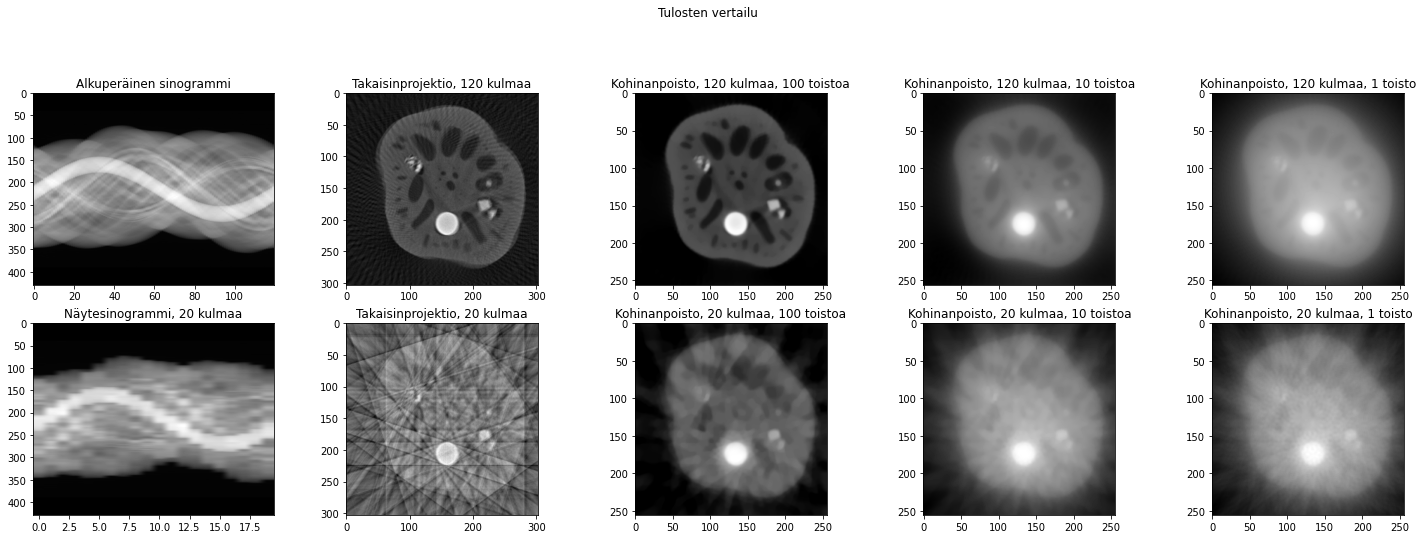

In [ ]:
# Kutsutaan apufunktiota, joka piirtää kuvat taulukkoon
tvr.drawPlots(images, angles, iterations)

#Lisätehtävä

Jos jää aikaa, voit käydä tekemässä viipalekuvaushaasteen [Samun tiedekanavalla](https://www.youtube.com/watch?v=TyLIurocwVQ)! Kuinka monta sait oikein?